In [1]:
#http://stackoverflow.com/questions/11845055/predicting-from-previous-datevalue-data
import matplotlib.pyplot as plt
import pandas as pd # v. 1.7
import MySQLdb
import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import mean_absolute_error,mean_squared_error
import statistics 

%matplotlib inline 

In [2]:
conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()

query_empty = """truncate table prediction.pred_meterall""" 
c.execute(query_empty)
print "prediction.pred_meterall are Empty!!! \n"

time_a = pd.date_range('2007-01-15 00:14:59', periods=96*31, freq='15T')

query = "SELECT * FROM prediction.pred_meter1 WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2007-01-15 00:14:59","2007-02-14 23:59:59")
df = pd.read_sql(query, conn , index_col=['Timestamp'])

query1 = "SELECT * FROM prediction.pred_meter2 WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2007-01-15 00:14:59","2007-02-14 23:59:59")
df1 = pd.read_sql(query1, conn , index_col=['Timestamp'])

query2 = "SELECT * FROM prediction.pred_meter3 WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2007-01-15 00:14:59","2007-02-14 23:59:59")
df2 = pd.read_sql(query2, conn , index_col=['Timestamp'])

query3 = "SELECT * FROM prediction.pred_meter4 WHERE Timestamp >= '%s'   AND TimeStamp <= '%s';"% ("2007-01-15 00:14:59","2007-02-14 23:59:59")
df3 = pd.read_sql(query3, conn , index_col=['Timestamp'])

i = 0
while (i<= len(df)-1):
    sumsub = df.watt_sub1[i]+df1.watt_sub2[i]+df2.watt_sub3[i]+df3.watt_sub4[i]
    c.execute("INSERT INTO prediction.pred_meterall (Timestamp, watt_sub1,watt_sub2,watt_sub3,watt_sub4,watt_sumsub) VALUES ( %s, %s, %s, %s, %s, %s)",(time_a[i],df.watt_sub1[i],df1.watt_sub2[i] ,df2.watt_sub3[i] ,df3.watt_sub4[i], sumsub ))
    conn.commit()
    i+=1
           
print "DONE?????????????????"

prediction.pred_meterall are Empty!!! 

DONE?????????????????


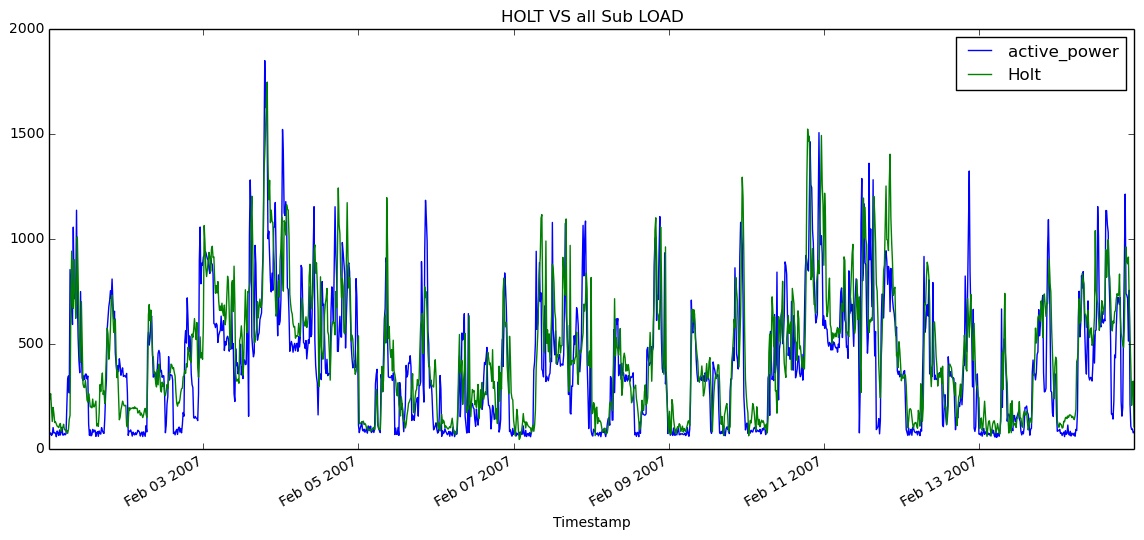

61.9183212646
Size of Data_load:  1344  Day = 14
Size of Data_holr:  1344  Day = 14


In [7]:
-